In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\Batia\Downloads\MarijampolesLigonine.csv")

C:\Users\Batia\AppData\Local\Temp\ipykernel_58576\1974717456.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Batia\Downloads\MarijampolesLigonine.csv")


In [4]:
df

,_type,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,tyrimo_data,tyrimo_meginio_tipas,tyrimo_analite,analites_loinc_kodas,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze
0,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,72871a31-4588-4f59-be67-0a1d05492c39,e9a60705-f0cd-4070-bd0b-45286afdb88c,NaN,000007019f43353,Marijampolės ligoninė,d3f886a58ca4f81,V,1952-01-01,Biochemija,2022-03-19,Kraujas,ABE (Tikrasis kraujo bazių ekscesas),1925-7,3.0,-2.000,3.00,mmol/l,NaN,NaN
1,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,d1c9940a-a6ec-4d10-a8fc-b10f079fab7e,2895cf60-6352-4822-93fe-dd64a2c854dd,NaN,000009280466c14,Marijampolės ligoninė,574673da58554f0,M,2004-01-01,Biochemija,2024-07-13,Serumas,Šlapalas,3094-0,2.0,2.140,7.14,mmol/l,NaN,NaN
2,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,4feb37cb-1c24-4c42-ae0f-a03098299ee6,db6623c8-8ba2-49fa-b3f7-6e493e6e6b2d,NaN,00000c7b60a01fa,Marijampolės ligoninė,75575bb79ace05b,V,1960-01-01,Biochemija,2023-04-27,Kraujas,Deoksigenuotas hemoglobinas (FHHb),4536-9,5.0,1.400,4.90,%,NaN,NaN
3,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,056c8924-12ba-47d3-b748-80e3d3a8ea2d,595d3e53-dc45-40ac-ad3b-87afa8152b89,NaN,00000ea9105eb51,Marijampolės ligoninė,c3771f5a3dd0ed7,M,1987-01-01,Šlapimas,2023-07-15,Šlapimas,Lyg. tankis (SG),5811-5,1.0,1.015,1.03,NaN,NaN,NaN
4,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,ff93dd12-2d56-4461-8b18-dddf4b913983,e34c6d4c-6d83-42b1-b33a-943e87b44193,NaN,00001123b4b10c4,Marijampolės ligoninė,7b6ace29757e892,M,1936-01-01,Hematologija,2024-11-18,Kraujas,Eozinofilai abs. (EOS#),711-2,0.0,0.030,0.44,10^9/l,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166954,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,9389913e-ba18-46cf-b4b1-5fec4124fb89,89fda9f4-2691-43bc-916b-2898049fc8d7,NaN,ffffe56c7fe257a,Marijampolės ligoninė,7019ab630abb764,M,1974-01-01,Hematologija,2022-03-25,Kraujas,Leukocitai (WBC),6690-2,5.0,4.000,9.00,10^9/l,NaN,NaN
3166955,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,6e40ac16-babe-435c-bc3c-9e4fc224f18e,f3115edd-108e-4d1a-8ff7-c513e6752659,NaN,ffffe68dda1e6cf,Marijampolės ligoninė,6cd39fb942a4dc3,M,1989-01-01,Hematologija,2022-11-09,Kraujas,Trombocitų hematokritas (PCT),51637-7,0.0,0.150,0.50,10^12/l,NaN,NaN
3166956,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,8bfb12b3-5184-44a0-b228-ebbbf43436af,2e9f3980-c89a-407b-b1ce-5be079f8f9b8,NaN,ffffe9385687f50,Marijampolės ligoninė,8cb0aeed6043da3,V,2017-01-01,Biochemija,2023-06-23,Kraujas,Oksihemoglobinas (FO2Hb),11559-2,94.0,90.000,95.00,%,NaN,NaN
3166957,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,7efb18a6-d0f6-4b07-bb68-fa82e9b7ef16,f0f0bb12-4ae4-4cd0-be4a-011b305dbd2b,NaN,ffffe965d6ec526,Marijampolės ligoninė,b26a493f244b1b6,V,1967-01-01,Biochemija,2023-11-13,Serumas,Natris (Na),2951-2,128.0,135.000,145.00,mmol/l,NaN,NaN


In [5]:
df = df.rename(columns={
    'paciento_lytis': 'gender',
    'paciento_gimimo_metai': 'birth_year',
    'tyrimo_data': 'test_date',
    'tyrimo_grupe': 'test_group',
    'tyrimo_meginio_tipas': 'sample_type',
    'tyrimo_analite': 'analyte',
    'analites_rezultatas': 'result',
    'analites_norma_nuo': 'norm_min',
    'analites_norma_iki': 'norm_max',
    'paciento_diagnoze': 'diagnosis',
    'istaigos_pav': 'hospital'
})


df['gender'] = df['gender'].map({'V': 'Male', 'M': 'Female'})


df['birth_year'] = pd.to_datetime(df['birth_year'], errors='coerce').dt.year
df['age'] = 2025 - df['birth_year']  


df['test_date'] = pd.to_datetime(df['test_date'], errors='coerce')


bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166959 entries, 0 to 3166958
Data columns (total 22 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   _type                               object        
 1   _id                                 object        
 2   _revision                           object        
 3   _page.next                          object        
 4   vda_prime_key                       object        
 5   hospital                            object        
 6   paciento_id                         object        
 7   gender                              object        
 8   birth_year                          int32         
 9   test_group                          object        
 10  test_date                           datetime64[ns]
 11  sample_type                         object        
 12  analyte                             object        
 13  analites_loinc_kodas                object

(None,
                                                _type  \
 0  datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...   
 1  datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...   
 2  datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...   
 3  datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...   
 4  datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...   
 
                                     _id                             _revision  \
 0  72871a31-4588-4f59-be67-0a1d05492c39  e9a60705-f0cd-4070-bd0b-45286afdb88c   
 1  d1c9940a-a6ec-4d10-a8fc-b10f079fab7e  2895cf60-6352-4822-93fe-dd64a2c854dd   
 2  4feb37cb-1c24-4c42-ae0f-a03098299ee6  db6623c8-8ba2-49fa-b3f7-6e493e6e6b2d   
 3  056c8924-12ba-47d3-b748-80e3d3a8ea2d  595d3e53-dc45-40ac-ad3b-87afa8152b89   
 4  ff93dd12-2d56-4461-8b18-dddf4b913983  e34c6d4c-6d83-42b1-b33a-943e87b44193   
 
   _page.next    vda_prime_key               hospital      paciento_id  gender  \
 0        NaN  000007019f43353  Marijampolės ligoninė  d3f886a58ca4f81   

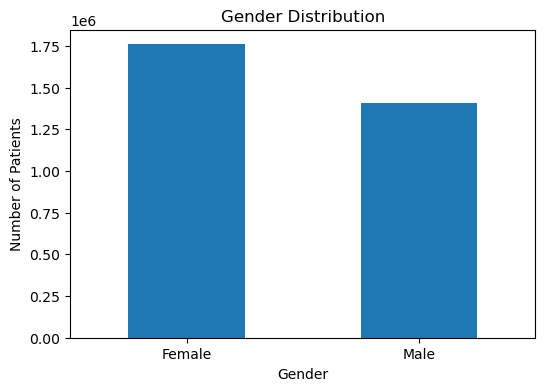

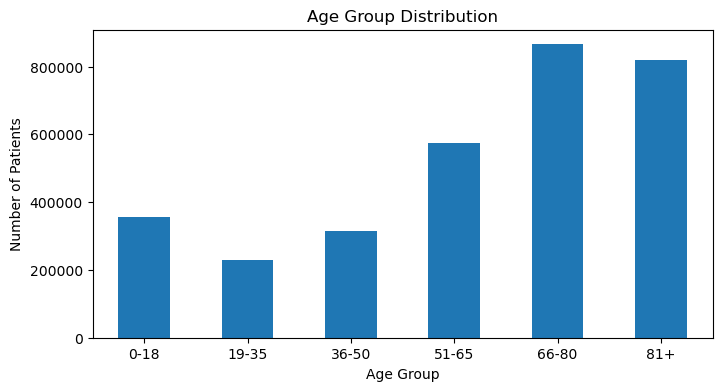

In [6]:
import matplotlib.pyplot as plt


gender_counts = df['gender'].value_counts()


age_group_counts = df['age_group'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.show()


plt.figure(figsize=(8, 4))
age_group_counts.plot(kind='bar')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.show()


C:\Users\Batia\AppData\Local\Temp\ipykernel_58576\2523925403.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_by_age_group = df.groupby('age_group')['out_of_range'].mean() * 100


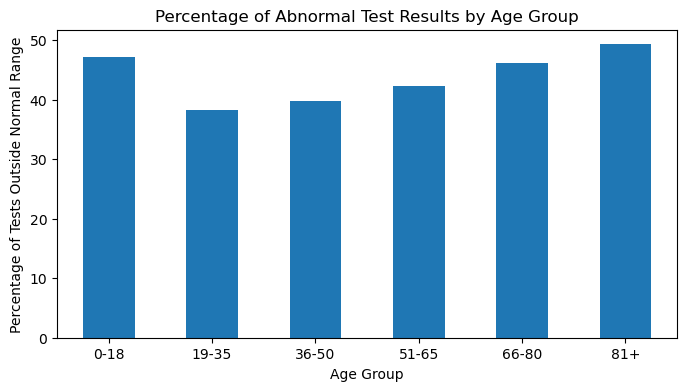

In [7]:

df['out_of_range'] = (df['result'] < df['norm_min']) | (df['result'] > df['norm_max'])


health_by_age_group = df.groupby('age_group')['out_of_range'].mean() * 100


plt.figure(figsize=(8, 4))
health_by_age_group.plot(kind='bar')
plt.title("Percentage of Abnormal Test Results by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Tests Outside Normal Range")
plt.xticks(rotation=0)
plt.show()


Older age groups and 0-18 group tend to have more tests falling outside normal ranges, indicating more health issues

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


marijampole_path = r"C:\Users\Batia\Downloads\MarijampolesLigonine.csv"
panevezys_path = r"C:\Users\Batia\Downloads\RespublikinePanevezioLigonine.csv"
druskininkai_path = r"C:\Users\Batia\Downloads\DruskininkuLigonine.csv"


df_marijampole = pd.read_csv(marijampole_path, encoding='utf-8')
df_panevezys = pd.read_csv(panevezys_path, encoding='utf-8')
df_druskininkai = pd.read_csv(druskininkai_path, encoding='latin1')


df_marijampole["hospital"] = "Marijampolės ligoninė"
df_panevezys["hospital"] = "Panevėžio ligoninė"
df_druskininkai["hospital"] = "Druskininkų ligoninė"


df_combined = pd.concat([df_marijampole, df_panevezys, df_druskininkai], ignore_index=True)


df_combined = df_combined.rename(columns={
    'paciento_lytis': 'gender',
    'paciento_gimimo_metai': 'birth_year',
    'tyrimo_data': 'test_date',
    'tyrimo_grupe': 'test_group',
    'tyrimo_meginio_tipas': 'sample_type',
    'tyrimo_analite': 'analyte',
    'analites_rezultatas': 'result',
    'analites_norma_nuo': 'norm_min',
    'analites_norma_iki': 'norm_max',
    'paciento_diagnoze': 'diagnosis'
})


df_combined['gender'] = df_combined['gender'].map({'V': 'Male', 'M': 'Female'})


df_combined['birth_year'] = pd.to_datetime(df_combined['birth_year'], errors='coerce').dt.year
df_combined['age'] = 2025 - df_combined['birth_year']


df_combined['test_date'] = pd.to_datetime(df_combined['test_date'], errors='coerce')


bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81+']
df_combined['age_group'] = pd.cut(df_combined['age'], bins=bins, labels=labels, right=False)


df_combined['out_of_range'] = (df_combined['result'] < df_combined['norm_min']) | (df_combined['result'] > df_combined['norm_max'])


df_combined.info(), df_combined['hospital'].value_counts()


C:\Users\Batia\AppData\Local\Temp\ipykernel_58576\370742895.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_marijampole = pd.read_csv(marijampole_path, encoding='utf-8')
C:\Users\Batia\AppData\Local\Temp\ipykernel_58576\370742895.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_panevezys = pd.read_csv(panevezys_path, encoding='utf-8')
C:\Users\Batia\AppData\Local\Temp\ipykernel_58576\370742895.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_druskininkai = pd.read_csv(druskininkai_path, encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10636522 entries, 0 to 10636521
Data columns (total 24 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   _type                               object        
 1   _id                                 object        
 2   _revision                           object        
 3   _page.next                          object        
 4   vda_prime_key                       object        
 5   istaigos_pav                        object        
 6   paciento_id                         object        
 7   gender                              object        
 8   birth_year                          int32         
 9   test_group                          object        
 10  test_date                           datetime64[ns]
 11  sample_type                         object        
 12  analyte                             object        
 13  analites_loinc_kodas                obje

(None,
 hospital
 Panevėžio ligoninė       7106067
 Marijampolės ligoninė    3166959
 Druskininkų ligoninė      363496
 Name: count, dtype: int64)

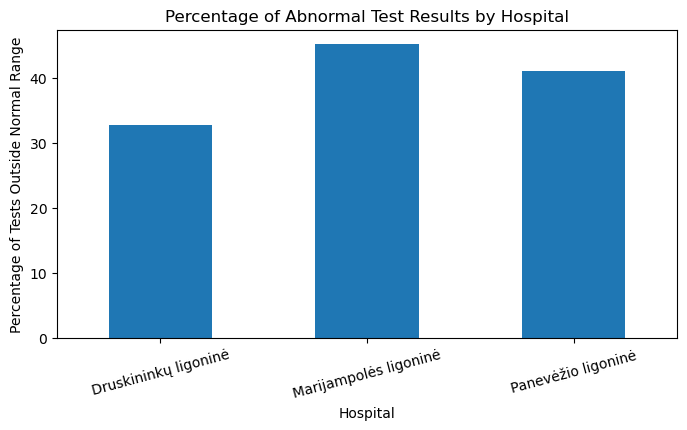

In [9]:
health_by_hospital = df_combined.groupby('hospital')['out_of_range'].mean() * 100


plt.figure(figsize=(8, 4))
health_by_hospital.plot(kind='bar')
plt.title("Percentage of Abnormal Test Results by Hospital")
plt.xlabel("Hospital")
plt.ylabel("Percentage of Tests Outside Normal Range")
plt.xticks(rotation=15)
plt.show()


C:\Users\Batia\AppData\Local\Temp\ipykernel_58576\3018199874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_by_hospital_age = df_combined.groupby(['hospital', 'age_group'])['out_of_range'].mean() * 100


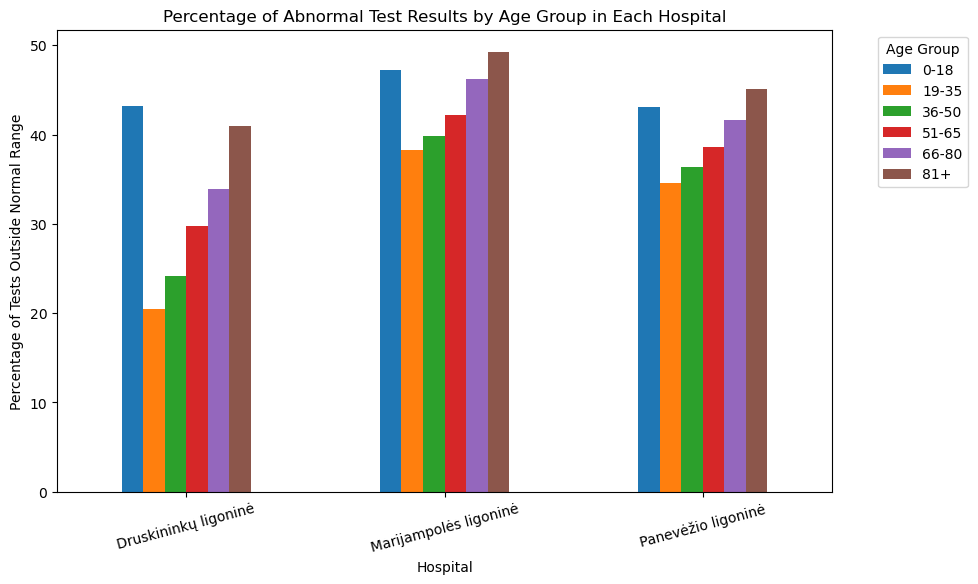

In [10]:

health_by_hospital_age = df_combined.groupby(['hospital', 'age_group'])['out_of_range'].mean() * 100


health_by_hospital_age = health_by_hospital_age.unstack()


health_by_hospital_age.plot(kind='bar', figsize=(10, 6))
plt.title("Percentage of Abnormal Test Results by Age Group in Each Hospital")
plt.xlabel("Hospital")
plt.ylabel("Percentage of Tests Outside Normal Range")
plt.xticks(rotation=15)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


0-18 and older age groups (66-80 and 81+) tend to have more abnormal results across all hospitals

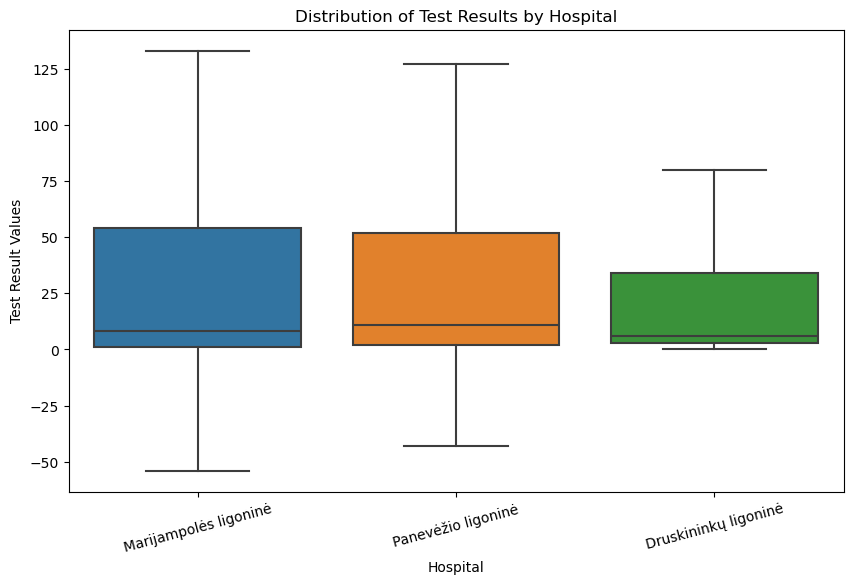

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.boxplot(x="hospital", y="result", data=df_combined, showfliers=False)
plt.title("Distribution of Test Results by Hospital")
plt.xlabel("Hospital")
plt.ylabel("Test Result Values")
plt.xticks(rotation=15)
plt.show()


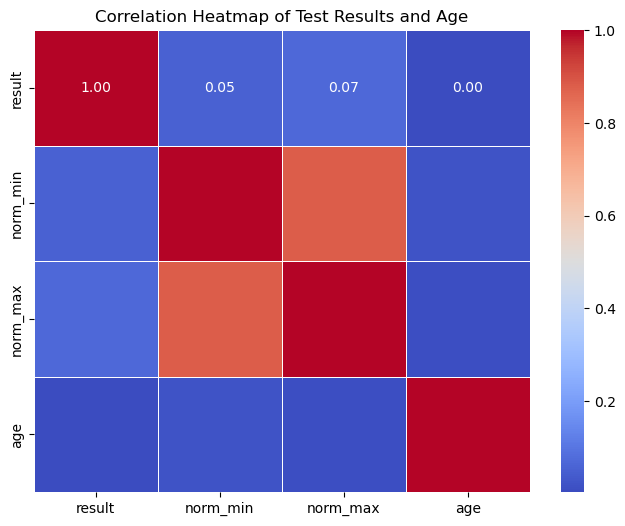

In [12]:
correlation_matrix = df_combined[['result', 'norm_min', 'norm_max', 'age']].corr()


plt.figure(figsize=(8, 6))


sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Test Results and Age")
plt.show()


In [13]:
numeric_cols = ['result', 'norm_min', 'norm_max', 'age']
df_numeric = df_combined[numeric_cols].dropna().astype(float)

df_numeric_cleaned = df_combined[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna().astype(float)

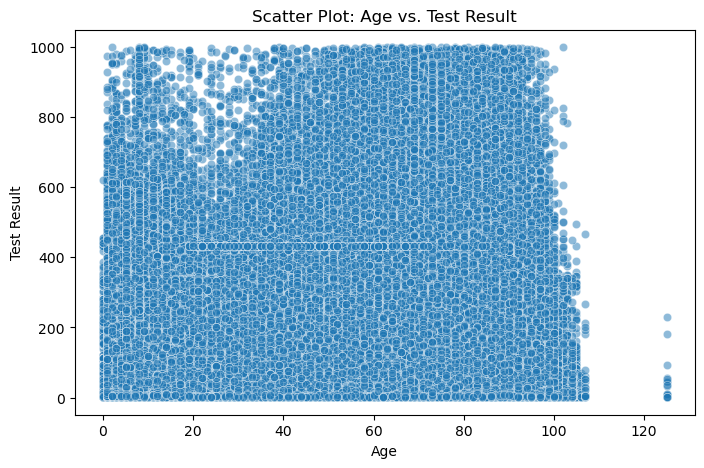

In [14]:
# Filter out extreme outliers
df_filtered = df_numeric_cleaned[(df_numeric_cleaned['result'] > 0) & (df_numeric_cleaned['result'] < 1000)]


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered['age'], y=df_filtered['result'], alpha=0.5)
plt.title("Scatter Plot: Age vs. Test Result")
plt.xlabel("Age")
plt.ylabel("Test Result")
plt.show()


In [18]:
def evaluate_health(user_age, user_gender, user_test, user_result, df):
    bins = [0, 18, 35, 50, 65, 80, 100]
    labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    
    group = df[(df['gender'] == user_gender) & (df['analyte'] == user_test)]
    
    if group.empty:
        return "No data available for this test and demographic group."
    
    
    avg_result = group['result'].mean()
    norm_min = group['norm_min'].mean()
    norm_max = group['norm_max'].mean()
    
    if norm_min <= user_result <= norm_max:
        status = "Your result is within the normal range."
    elif user_result < norm_min:
        status = "Your result is below the normal range. You may need further evaluation."
    else:
        status = "Your result is above the normal range. You may need further evaluation."
    
    comparison = f"Average result for your group: {avg_result:.2f} | Normal range: {norm_min:.2f} - {norm_max:.2f}"
    
    return f"{status}\n{comparison}"


user_age = 40
user_gender = 'Female'
user_test = 'Gliukozė serume'
user_result = 6.5


print(evaluate_health(user_age, user_gender, user_test, user_result, df_combined))


Your result is above the normal range. You may need further evaluation.
Average result for your group: 6.60 | Normal range: 3.97 - 5.96


In [16]:
df_combined

,_type,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,gender,birth_year,test_group,...,result,norm_min,norm_max,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,diagnosis,hospital,age,age_group,out_of_range
0,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,72871a31-4588-4f59-be67-0a1d05492c39,e9a60705-f0cd-4070-bd0b-45286afdb88c,NaN,000007019f43353,Marijampolės ligoninė,d3f886a58ca4f81,Male,1952,Biochemija,...,3.0,-2.000,3.00,mmol/l,NaN,NaN,Marijampolės ligoninė,73,66-80,False
1,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,d1c9940a-a6ec-4d10-a8fc-b10f079fab7e,2895cf60-6352-4822-93fe-dd64a2c854dd,NaN,000009280466c14,Marijampolės ligoninė,574673da58554f0,Female,2004,Biochemija,...,2.0,2.140,7.14,mmol/l,NaN,NaN,Marijampolės ligoninė,21,19-35,True
2,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,4feb37cb-1c24-4c42-ae0f-a03098299ee6,db6623c8-8ba2-49fa-b3f7-6e493e6e6b2d,NaN,00000c7b60a01fa,Marijampolės ligoninė,75575bb79ace05b,Male,1960,Biochemija,...,5.0,1.400,4.90,%,NaN,NaN,Marijampolės ligoninė,65,66-80,True
3,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,056c8924-12ba-47d3-b748-80e3d3a8ea2d,595d3e53-dc45-40ac-ad3b-87afa8152b89,NaN,00000ea9105eb51,Marijampolės ligoninė,c3771f5a3dd0ed7,Female,1987,Šlapimas,...,1.0,1.015,1.03,NaN,NaN,NaN,Marijampolės ligoninė,38,36-50,True
4,datasets/gov/lab_tyrimai/lab_tyrimai/Marijampo...,ff93dd12-2d56-4461-8b18-dddf4b913983,e34c6d4c-6d83-42b1-b33a-943e87b44193,NaN,00001123b4b10c4,Marijampolės ligoninė,7b6ace29757e892,Female,1936,Hematologija,...,0.0,0.030,0.44,10^9/l,NaN,NaN,Marijampolės ligoninė,89,81+,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10636517,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,09fad131-8ff5-4dfd-82b1-8a2d5b28625c,c80fe640-76f3-405e-b9d5-e05c0f81edc6,NaN,fffea359939580a,DruskininkÅ³ ligoninÄ,eb22570ff2ebe8b,Female,1969,Biochemija,...,11.0,0.000,31.00,U/l,Z00,"AsmenÅ³, neturinÄiÅ³ nusiskundimÅ³ ar nustaty...",Druskininkų ligoninė,56,51-65,False
10636518,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,f4a85893-dfdb-43b6-9e06-4bd1c7a34b8a,cc1bf903-2c58-4cd1-8760-f0e4f5c06d7c,NaN,fffefacbcfef509,DruskininkÅ³ ligoninÄ,e539d1e642bad67,Female,1958,Biochemija,...,1.0,0.460,1.60,mmol/l,Z00,"AsmenÅ³, neturinÄiÅ³ nusiskundimÅ³ ar nustaty...",Druskininkų ligoninė,67,66-80,False
10636519,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,37d41d5a-63a4-4d8d-935e-d719d8f386e4,b6c20ecd-7ddf-41d8-a101-26beddad12b1,NaN,ffff5adaf09231b,DruskininkÅ³ ligoninÄ,126563af2cb9dee,Female,1970,Biochemija,...,4.0,3.500,5.30,mmol/l,Z00,"AsmenÅ³, neturinÄiÅ³ nusiskundimÅ³ ar nustaty...",Druskininkų ligoninė,55,51-65,False
10636520,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,4a6fdb9c-2242-40cd-a9c8-467b1d7cebf6,afe7b499-2d54-4115-91bd-0c7a9d8bfa4d,NaN,ffffa2a141eaed0,DruskininkÅ³ ligoninÄ,f6942a590e10969,Female,1956,Biochemija,...,22.0,70.000,130.00,%,Z00,"AsmenÅ³, neturinÄiÅ³ nusiskundimÅ³ ar nustaty...",Druskininkų ligoninė,69,66-80,True
